# <center>Práctica 2 MOEG: Programación Lineal.<center>


### <center>José Walter Hernández Pérez<center>

<p align="center">
  <img src="https://1000marcas.net/wp-content/uploads/2019/12/URJC-600x338.jpg" alt="URJC Logo" width="250" height="119">
</p>

# Introducción:
El uso de la programación lineal y la sensibilidad son bases fundamentales para comprender el campo de la optimización. Debido a ello se desarrolla esta segunda práctica donde se le da solución a los ejercicios propuestos en el documento. El formato elegido, un cuaderno de jupyter, se debe a la fácil incorporación de código ejecutable y celdas de texto para las explicaciones; permitiendo así que un solo archivo se tenga todo lo necesario para la ejecución de la práctica. 

Como la aplicación es en el lenguaje de python haremos uso de la librería scipy en su versión "scipy 1.4.*" que a su vez requiere de numpy. Concretamente aprovecharemos la función linprog.

In [2]:
from scipy.optimize import linprog

# Ejercicio 1:
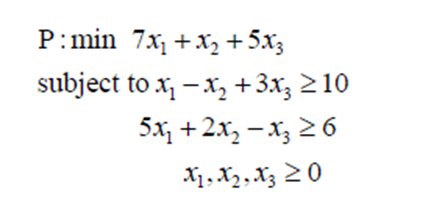

Primero empezaremos calculando el primal solo para contrastar resultados:

In [13]:
obj = [7, 1, 5]

lhs_ineq = [[-1, 1, -3], [-5, -2, 1]]

rhs_ineq = [-10, -6]

bnd = [(0, float("inf")), (0, float("inf")), (0, float("inf"))]

opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq, bounds=bnd)

print(opt.fun)
print(opt.x)

25.999999903497027
[1.74999999e+00 1.85667727e-08 2.74999999e+00]


c:\Users\kaise\anaconda3\envs\moeg\lib\site-packages\numpy\core\fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Ahora pasamos al dual, que al ser de maximización tendremos que cambiar los signos de la función a optimizar:

In [14]:
obj = [-10, -6]

lhs_ineq = [[1, 5], [-1, 2], [3, -1]]

rhs_ineq = [7, 1, 5]

bnd = [(0, float("inf")), (0, float("inf"))]

opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq, bounds=bnd)

print(opt.fun)
print(opt.x)

-25.99999992154423
[1.99999999 1.        ]


c:\Users\kaise\anaconda3\envs\moeg\lib\site-packages\numpy\core\fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Recordemos que hemos cambiado el signo debido a las limitaciones de la librería, es por ello que el resultado obtenido debería de ser tomado como valor absoluto. Teniendo en cuenta lo anterior, vemos que los valores de ambos coinciden en aproximadamente 25.9999999, siendo este el máximo de la función objetivo.

# Ejercicio 2:
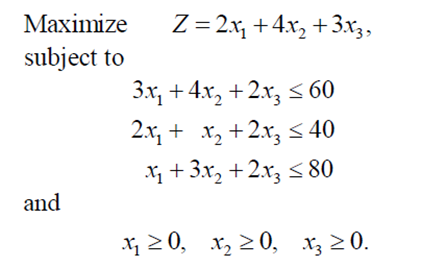

Nuevamente hacemos el primal:

In [15]:
obj = [-2, -4, -3]

lhs_ineq = [[3, 4, 2], [2, 1, 2], [1, 3, 2]]

rhs_ineq = [60, 40, 80]

bnd = [(0, float("inf")), (0, float("inf")), (0, float("inf"))]

opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq, bounds=bnd)

print(opt.fun)
print(opt.x)

-76.66666661675963
[8.15203320e-11 6.66666666e+00 1.66666667e+01]


c:\Users\kaise\anaconda3\envs\moeg\lib\site-packages\numpy\core\fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Lo pasamos a dual:

In [16]:
obj = [60, 40, 80]

lhs_ineq = [[-3, -2, -1], [-4, -1, -3], [-2, -2, -2]]

rhs_ineq = [-2, -4, -3]

bnd = [(0, float("inf")), (0, float("inf")), (0, float("inf"))]

opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq, bounds=bnd)

print(opt.fun)
print(opt.x)

76.666666712261
[8.33333334e-01 6.66666667e-01 1.28897848e-10]


c:\Users\kaise\anaconda3\envs\moeg\lib\site-packages\numpy\core\fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Nuevamente vuelven a coincidir los resultados en valor absoluto, en esta ocasión en aproximadamente 76.666666.

# Problema 3:
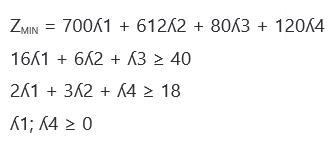

Ahora partimos de un dual que resolveremos para contrastar:

In [17]:
obj = [700, 612, 80, 120]

lhs_ineq = [[-16, -6, -1, 0], [-2, -3, 0, -1]]

rhs_ineq = [-40, -18]  

bnd = [(0, float("inf")), (0, None), (0, None), (0, float("inf"))]  # Bounds for lambda variables

opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq, bounds=bnd)

print(opt.fun)
print(opt.x)

3309.9999960240084
[2.50000000e+00 3.12296922e-10 2.37816507e-09 1.30000000e+01]


Para llegar al primal simplemente haremos el dual del dual:


In [18]:
obj = [-40, -18]

lhs_ineq = [[16, 2], [6, 3], [1, 0], [0, 1]]
 
rhs_ineq = [700, 612, 80, 120]

bnd = [(0, float("inf")), (0, float("inf"))]

opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq, bounds=bnd)

print(opt.fun)
print(opt.x)

-3309.9999932706664
[ 28.74999994 119.99999975]


Como se puede observar los valores coinciden en ambas versiones, ahora en 3309.99999 aproximadamente.

# Ejercicio de sensibilidad:

En este caso partimos de función a optimizar con una serie de restricciones. Esta representa la producción de dos productos cuyos beneficios vienen dados por la función Z a maximizar. Las restricciones son el tiempo que tardan las dos máquinas necesarias para dicha producción.

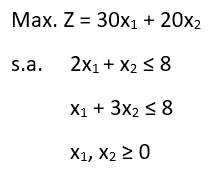


Si resolvemos nos da que el máximo es de 128 de beneficio, pero realizaremos una serie de cambios para ver como afectan a la función objetivo. Primeramente aplicaremos un aumento de 2 horas en la máquina 2 y de 1 hora en la máquina 1.

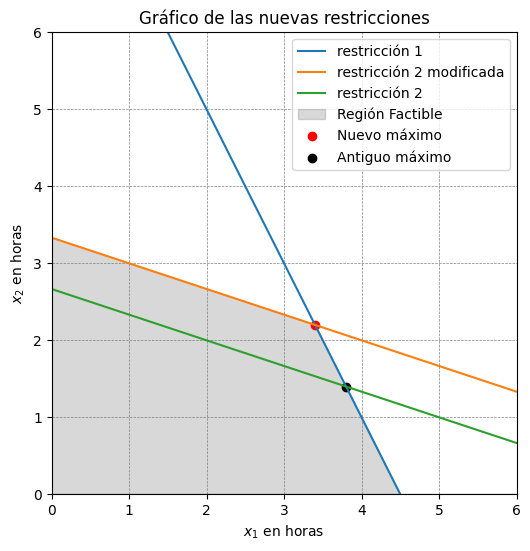

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Generar valores para x1
x1 = np.linspace(0, 10, 100)

# Calcular los valores correspondientes de x2 para las ecuaciones existentes
x2_1 = -2 * x1 + 9  # Para la ecuación 2x1 + x2 <= 9
x2_2 = (-1/3) * x1 + 10/3  # Para la ecuación x1 + 3x2 <= 10

# Nueva ecuación: x1 + 3x2 <= 8
x2_3 = (8 - x1) / 3

# Crear el gráfico
plt.figure(figsize=(6, 6))

# Trazar las líneas correspondientes a las ecuaciones
plt.plot(x1, x2_1, label=r'restricción 1')
plt.plot(x1, x2_2, label=r'restricción 2 modificada')
plt.plot(x1, x2_3, label=r'restricción 2')

# Encontrar el área común entre la restricción 1 y la 2 modificada
x2_common = np.minimum(x2_2, x2_1)
plt.fill_between(x1, x2_common, 0, where=(x2_1 >= x2_common), alpha=0.3, color='grey', label='Región Factible')

# Dibujar el punto
plt.scatter(3.4, 2.2, color='red', label='Nuevo máximo')
plt.scatter(3.8, 1.4, color='black', label='Antiguo máximo')

# Límites del gráfico
plt.xlim(0, 6)
plt.ylim(0, 6)

# Agregar etiquetas y título
plt.xlabel('$x_1$ en horas')
plt.ylabel('$x_2$ en horas')
plt.title('Gráfico de las nuevas restricciones')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend()

# Mostrar el gráfico
plt.show()

Como podemos ver la región factible se ha desplazado dando lugar a un nuevo máximo en la función. Como ahora disponemos de más tiempo la producción aumenta y nos brinda un beneficio de 146.

Ahora partamos de un nuevo caso donde volveremos a las restriccionens originales y disminuiremos la disponibilidad de la máquina 1 en 1 hora.

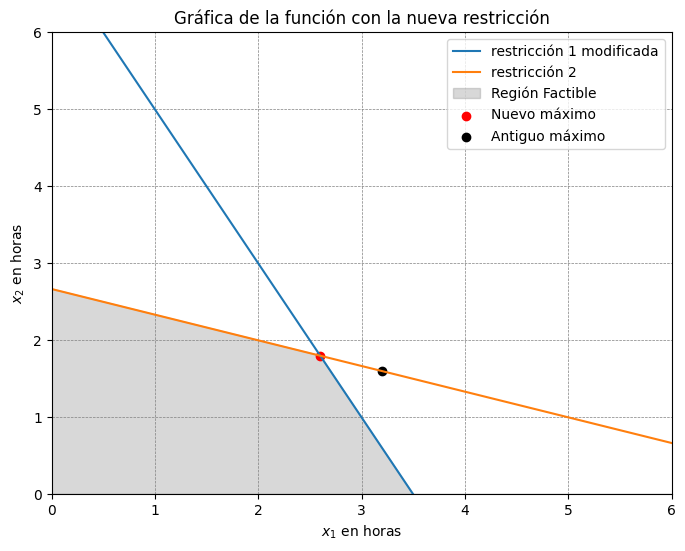

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Generar valores para x1 y x2
x1 = np.linspace(0, 6, 100)
x2 = np.linspace(0, 6, 100)

# Crear una malla de valores para x1 y x2
X1, X2 = np.meshgrid(x1, x2)

# Calcular las restricciones para el gráfico
x2_1 = 7 - 2 * x1  # Para la ecuación 2x1 + x2 <= 7
x2_2 = (8 - x1) / 3  # Para la ecuación x1 + 3x2 <= 8

# Crear el gráfico
plt.figure(figsize=(8, 6))

# Encontrar el área común entre las restricciones
x2_common = np.minimum(x2_2, x2_1)

# Trazar las restricciones
plt.plot(x1, x2_1, label='restricción 1 modificada')
plt.plot(x1, x2_2, label='restricción 2')

# Área común sombreada
plt.fill_between(x1, x2_common, 0, where=(x2_1 >= x2_common), alpha=0.3, color='grey', label='Región Factible')

# Dibujar el punto
plt.scatter(2.6, 1.8, color='red', label='Nuevo máximo')
plt.scatter(3.2, 1.6, color='black', label='Antiguo máximo')


# Límites del gráfico
plt.xlim(0, 6)
plt.ylim(0, 6)

# Etiquetas y título
plt.xlabel('$x_1$ en horas')
plt.ylabel('$x_2$ en horas')
plt.title('Gráfica de la función con la nueva restricción')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend()

# Mostrar el gráfico
plt.show()


Nuevamente se ha modificado la región factible dando como resultado un nuevo máximo y como era de esperar este es menor que el anterior siendo ahora aproximadamente de 114.

Este código de abajo solo nos es útil para comprobar los puntos en la función.

In [19]:
obj = [-30, -20]

lhs_ineq = [[2, 1], [1, 3]]

rhs_ineq = [9, 10]

bnd = ((0, float("inf")), (0, float("inf")))

opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq, bounds=bnd)

print(opt.fun)
print(opt.x)

-145.99999955886324
[3.39999999 2.19999999]
